In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.25)
%matplotlib inline

## Version 1

In [ ]:
data = read_csv(os.path.join('data','data.csv'))

In [ ]:
gb = data.groupby(['Subject','Valence','Action']).Accuracy.mean().reset_index()
gb['Condition'] = data['Valence'] + '-' + data['Action']
gb['Condition'] = gb['Condition'].replace({'Win-Go':'GW','Win-No-Go':'NGW','Lose-Go':'GAL','Lose-No-Go':'NGAL'})
sns.stripplot('Condition','Accuracy',data=gb,order=['GW','NGW','GAL','NGAL'])

In [ ]:
data['Condition'] = data['Valence'] + '-' + data['Action']
data['Condition'] = data['Condition'].replace({'Win-Go':'GW','Win-No-Go':'NGW','Lose-Go':'GAL','Lose-No-Go':'NGAL'})

fig, ax = plt.subplots(1,1,figsize=(12,4))
ax = sns.lineplot('Trial','Accuracy',hue='Condition',data=data,ci=None,hue_order=['GW','NGW','GAL','NGAL'])
ax.legend(loc=7,bbox_to_anchor=(1.2,0.5),frameon=False)
ax.axvline(80,color='k',lw=2)
ax.set(xlim=(0,160))

sns.despine()

## Version 2

In [19]:
data = read_csv(os.path.join('data','data.csv')).query('Version==2')
data['Exposure'] = data.groupby(['Subject','Robot']).Trial.transform(lambda x: np.arange(x.size)+1)
data['Robot'] = data.Robot.replace({1:'GW',2:'NGW',3:'GAL',4:'NGAL'})

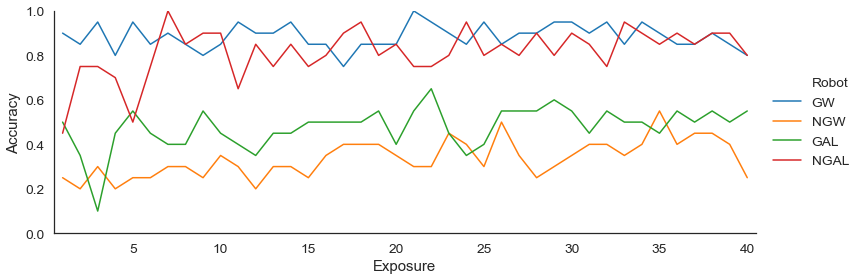

In [20]:
fig, ax = plt.subplots(1,1,figsize=(12,4))
palette = sns.color_palette(n_colors=4)

sns.lineplot('Exposure', 'Accuracy', 'Robot', data=data, hue_order=['GW','NGW','GAL','NGAL'], 
             palette=palette, ci=None, ax=ax)
ax.set(xlim=(0.5,40.5), ylim=(0,1))
ax.legend(loc=7, bbox_to_anchor=(1.15,0.5), frameon=False)

sns.despine()
plt.tight_layout()

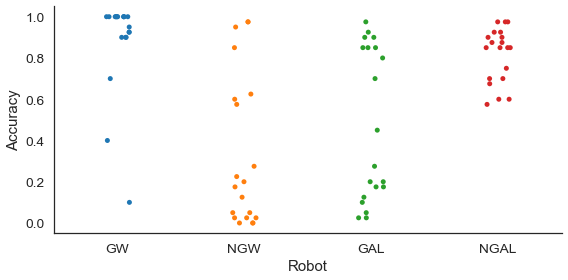

In [27]:
fig, ax = plt.subplots(1,1,figsize=(8,4))
palette = sns.color_palette(n_colors=4)

gb = data.groupby(['Subject','Robot']).Accuracy.mean().reset_index()
sns.stripplot('Robot', 'Accuracy', data=gb, order=['GW','NGW','GAL','NGAL'], palette=palette)
ax.set(ylim=(-0.05,1.05))

sns.despine()
plt.tight_layout()